In [212]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
img=cv2.imread('./test_image/image_1.jpg')
img.shape

(1293, 1080, 3)

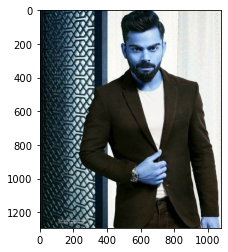

In [214]:
plt.imshow(img)

In [215]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1293, 1080)

In [216]:
gray

array([[ 39,  39,  39, ..., 236, 236, 236],
       [ 39,  39,  39, ..., 236, 236, 236],
       [ 39,  39,  39, ..., 236, 236, 236],
       ...,
       [ 29,  29,  30, ..., 244, 244, 244],
       [ 29,  29,  30, ..., 243, 244, 245],
       [ 29,  29,  30, ..., 243, 244, 245]], dtype=uint8)

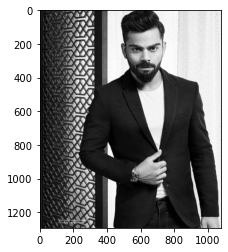

In [217]:
plt.imshow(gray,cmap='gray')

In [218]:
face_cascade=cv2.CascadeClassifier('./haarcascade/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./haarcascade/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces
# array[x,y,width,height] Indicates where face starts

array([[483, 125, 281, 281]], dtype=int32)

In [219]:
(x,y,w,h)=faces[0]
x,y,w,h

(483, 125, 281, 281)

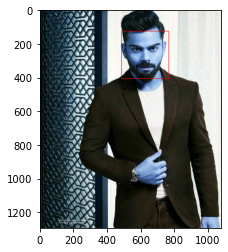

In [220]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

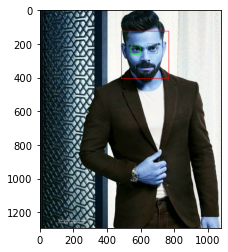

In [221]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2. rectangle (roi_color, (ex, ey), (ex+ew, ey+eh), (0,255, 0), 2)
plt. figure()
plt.imshow(face_img, cmap='gray')
plt. show()

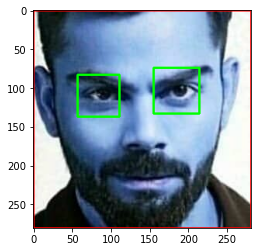

In [222]:
plt.imshow(roi_color,cmap='gray')

In [233]:
def get_cropped_image(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

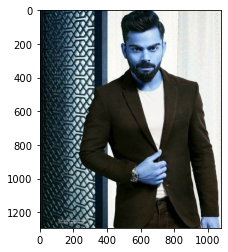

In [234]:
original_image=cv2.imread('./test_image/image_1.jpg')
plt.imshow(original_image)

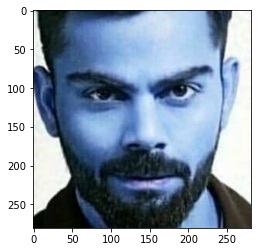

In [235]:
cropped_image=get_cropped_image('./test_image/image_1.jpg')
plt.imshow(cropped_image)

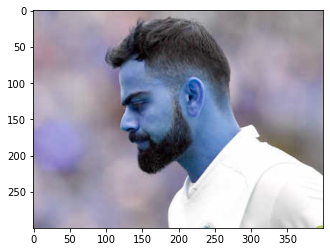

In [236]:
org_image_obstructed=cv2.imread('./test_image/image_2.jpeg')
plt.imshow(org_image_obstructed)

In [237]:
#2 eyes not detected hence this image cannot be used
cropped_image_no_2=get_cropped_image('./test_image/image_2.jpeg')
cropped_image_no_2

In [238]:
#Creating folder Cropped for training data
path_to_data='./dataset'
path_to_cr_data='./dataset/cropped/'

In [239]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [240]:
img_dirs

['./dataset/maria_sharapova',
 './dataset/virat_kohli',
 './dataset/lionel_messi',
 './dataset/cropped',
 './dataset/serena_williams',
 './dataset/roger_federer']

In [241]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [242]:
cropped_image_dirs=[]
celebrity_file_name_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_name_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder) 
                print("Generating cropped images: ",cropped_folder)
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count+=1

maria_sharapova
Generating cropped images:  ./dataset/cropped/maria_sharapova
virat_kohli
Generating cropped images:  ./dataset/cropped/virat_kohli


error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [ ]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
celebrity_file_names_dict